In [1]:
import scipy.stats
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Fix the random generator seed
np.random.seed(111)


# Ground truth values
mu = 3.7
sigma = 2

# Number of samples in each experiment
n = 9 

# Confidence level
gamma = 0.99 # 99 %

# Number of experiments to carry out
#nexp = 20 # TODO: Change this when you have developed your code
nexp = 10000

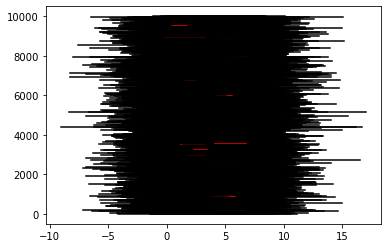

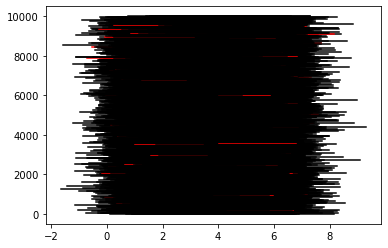

In [3]:
counter = 0
counter_c = 0
for i in range(nexp):
    x = np.random.normal(mu,sigma,n) # simulates n realizations from a Gaussian with mean mu and var sigma^2
    #sig = sigma
    sig = np.var(x, ddof=1) # TODO: adapt for b) 
    fac1 = scipy.stats.norm.ppf((1-gamma)/2, 0, 1) # computes the 0.5% quantile of a Gaussian, roughly -2.576  
    fac2 = scipy.stats.norm.ppf((1-gamma)/2 + gamma, 0, 1) # computes the 99.5% quantile of a Gaussian, roughly 2.576   
    xmean = np.mean(x) # Sample mean
    a = xmean - fac2*sig/np.sqrt(n) 
    b = xmean - fac1*sig/np.sqrt(n) 
    ac = xmean - scipy.stats.t.ppf((1-gamma)/2 + gamma, n-1) * statistics.stdev(x)/np.sqrt(n)
    bc = xmean - scipy.stats.t.ppf((1-gamma)/2, n-1) * statistics.stdev(x)/np.sqrt(n)
    # ac = xmean - fac2*sig/np.sqrt(n) # TODO: adapt for c)
    # bc = xmean - fac1*sig/np.sqrt(n) # TODO: adapt for c)

    # b) plotting and counting code
    if (a <= mu) & (mu <= b):
        if nexp < 10001:
            plt.figure(1)
            plt.plot((a, b), (i, i), 'k-')
    else:
        counter = counter + 1
        if nexp < 10001:
            plt.figure(1)
            plt.plot((a, b), (i, i), 'r-')
            
    # c) plotting and counting code
    if (ac <= mu) & (mu <= bc):
        if nexp < 10001:
            plt.figure(2)
            plt.plot((ac, bc), (i, i), 'k-')
    else:
        counter_c = counter_c + 1
        if nexp < 10001:
            plt.figure(2)
            plt.plot((ac, bc), (i, i), 'r-')

In [4]:
# Number of times the correct mu and confidence interval is not matching
print(str(100.0 * gamma) + "%-confidence interval:")
print("b) Not matching in " + str(counter) + " (out of " + str(nexp) + ") experiments, " + str(100.0*counter/nexp) + "%") 
print("c) Not matching in " + str(counter_c) + " (out of " + str(nexp) + ") experiments, " + str(100.0*counter_c/nexp) + "%") 

99.0%-confidence interval:
b) Not matching in 131 (out of 10000) experiments, 1.31%
c) Not matching in 97 (out of 10000) experiments, 0.97%


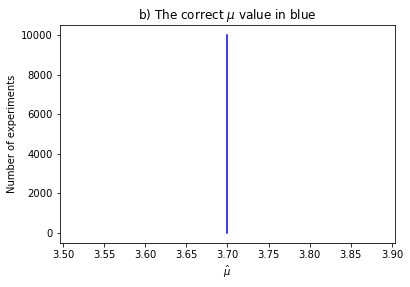

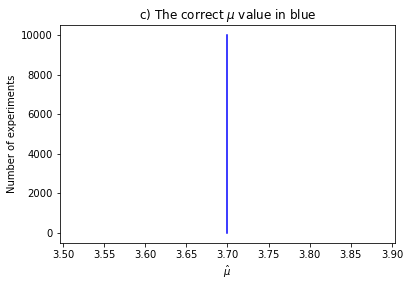

In [5]:
if nexp < 10001:
    plt.figure(1)
    plt.plot((mu, mu), (0, nexp), 'b-')
    plt.xlabel('$\hat{\mu}$')
    plt.ylabel('Number of experiments')
    plt.title('b) The correct $\mu$ value in blue')
    
    plt.figure(2)
    plt.plot((mu, mu), (0, nexp), 'b-')
    plt.xlabel('$\hat{\mu}$')
    plt.ylabel('Number of experiments')
    plt.title('c) The correct $\mu$ value in blue')
    plt.show()